<a href="https://colab.research.google.com/github/Vijaylaxmi-30/melbourne-house-price-prediction/blob/main/MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


#READ CSV FILE

In [2]:
import pandas as pd

df = pd.read_csv('/content/MELBOURNE_HOUSE_PRICES_LESS.csv')
print(df.shape)
df.head()


(63023, 13)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [3]:
df = df.drop(['Address', 'Date', 'SellerG'], axis=1, errors='ignore')
df = df.dropna(subset=['Price'])


#Encoding Categorical Variables

In [4]:
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


#CHECK BASIC INFORMATION

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48433 entries, 0 to 63020
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  int64  
 1   Rooms          48433 non-null  int64  
 2   Type           48433 non-null  int64  
 3   Price          48433 non-null  float64
 4   Method         48433 non-null  int64  
 5   Postcode       48433 non-null  int64  
 6   Regionname     48433 non-null  int64  
 7   Propertycount  48433 non-null  int64  
 8   Distance       48433 non-null  float64
 9   CouncilArea    48433 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 4.1 MB


In [6]:

print("\nNull values per column:")
print(df.isnull().sum())

print("\nMissing values per column:")
print(df.isna().sum())

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Null values per column:
Suburb           0
Rooms            0
Type             0
Price            0
Method           0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

Missing values per column:
Suburb           0
Rooms            0
Type             0
Price            0
Method           0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

Number of duplicate rows:
5916


#Price Distribution (Histogram)

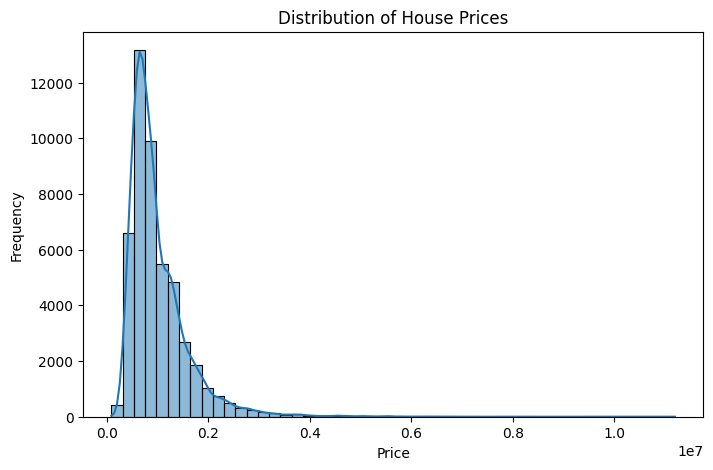

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


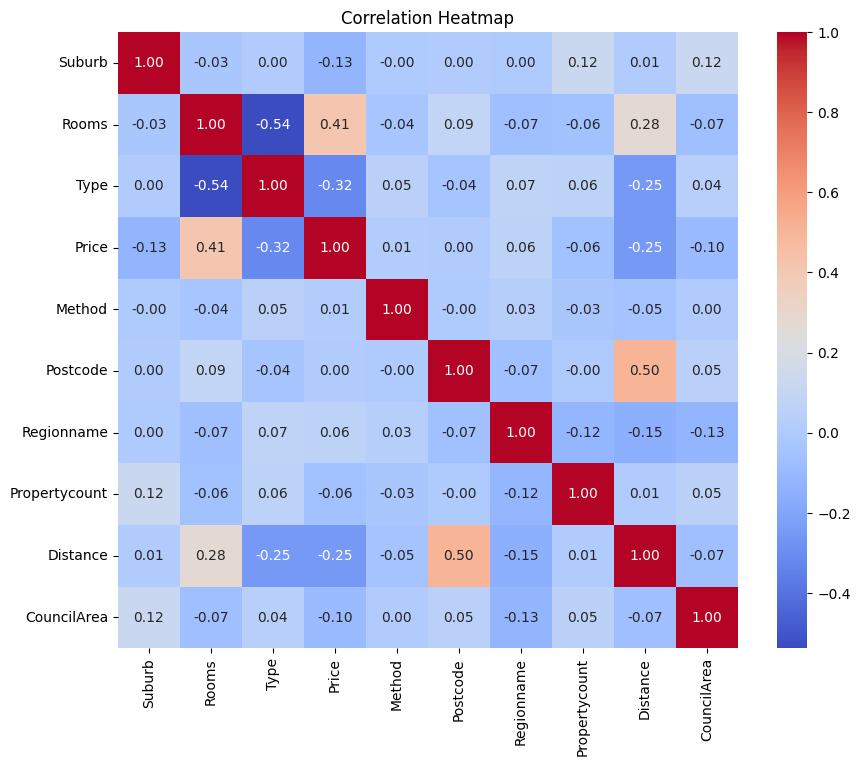

In [8]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


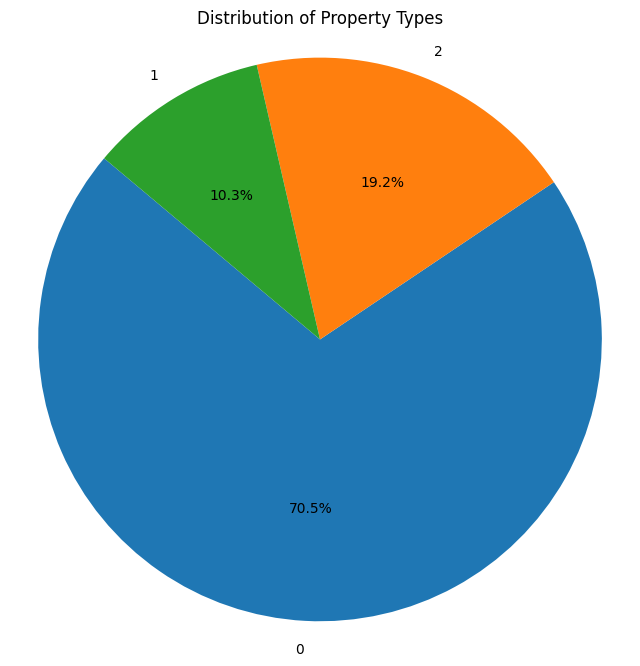

In [9]:
# prompt: pie chart

import matplotlib.pyplot as plt
# Pie Chart for Type Distribution
type_counts = df['Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Property Types")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

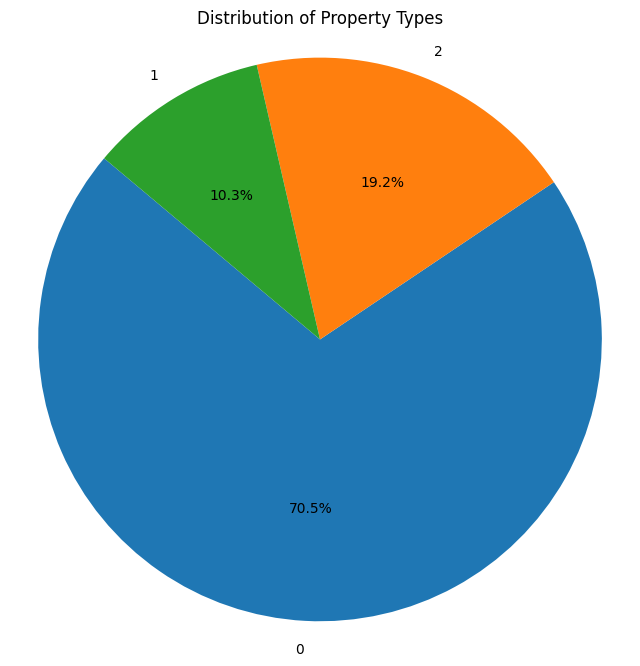

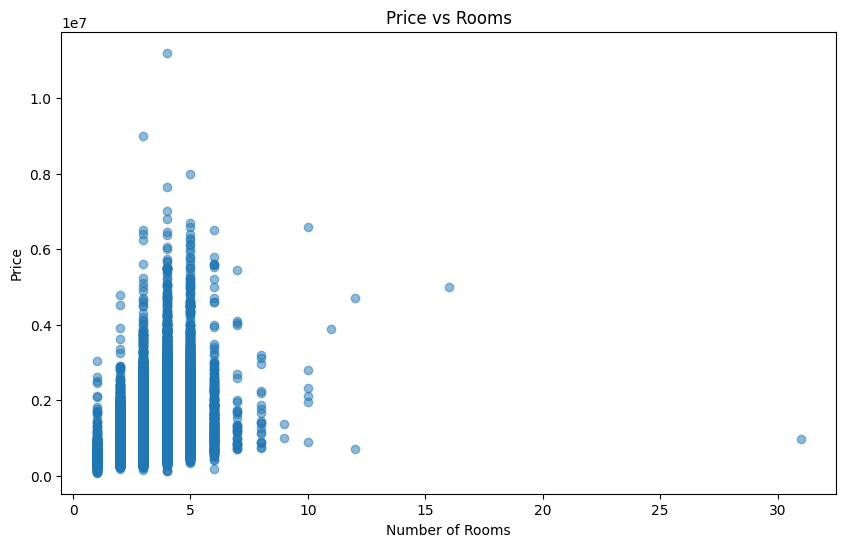

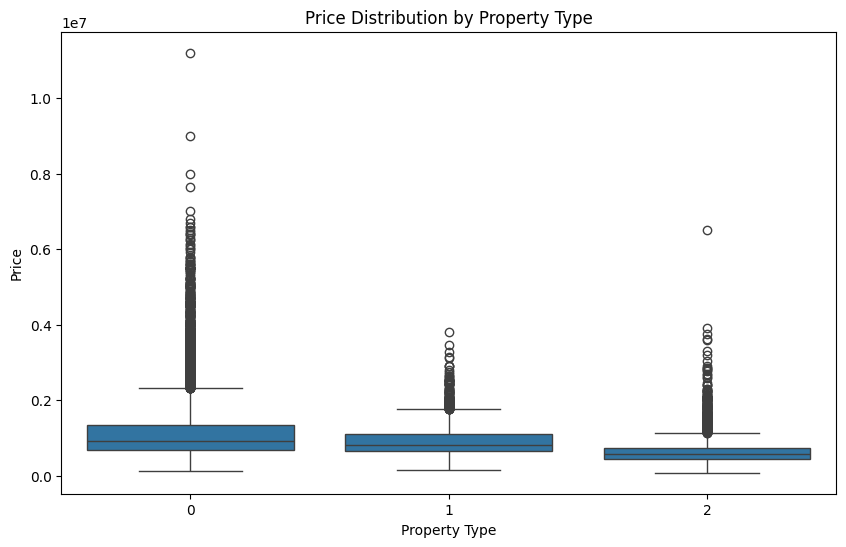

In [10]:
# prompt: visualize data using piechart, scattered plot and box plot seperately

import matplotlib.pyplot as plt
# Pie chart (example for 'Type' column)
# You should choose a categorical column that makes sense to visualize with a pie chart.
# Let's assume 'Type' is suitable.
type_counts = df['Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Property Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Scatter plot (example for 'Price' vs 'Rooms')
plt.figure(figsize=(10, 6))
plt.scatter(df['Rooms'], df['Price'], alpha=0.5)
plt.title('Price vs Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

# Box plot (example for 'Price' by 'Type')
# Assuming 'Type' is a relevant categorical variable for box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df)
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

/tmp/ipython-input-11-1456550985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suburbs.values, y=top_suburbs.index, palette='viridis')


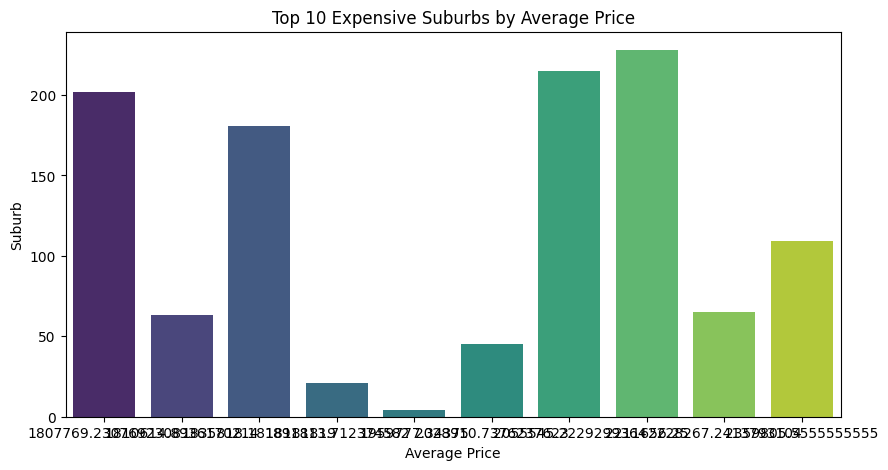

In [11]:
top_suburbs = df.groupby('Suburb')['Price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_suburbs.values, y=top_suburbs.index, palette='viridis')
plt.title("Top 10 Expensive Suburbs by Average Price")
plt.xlabel("Average Price")
plt.ylabel("Suburb")
plt.show()


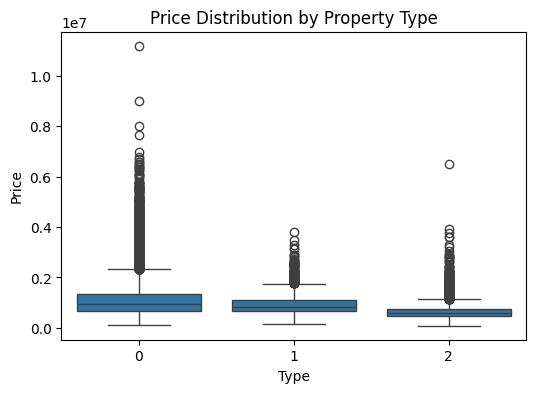

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Type', y='Price')
plt.title("Price Distribution by Property Type")
plt.show()


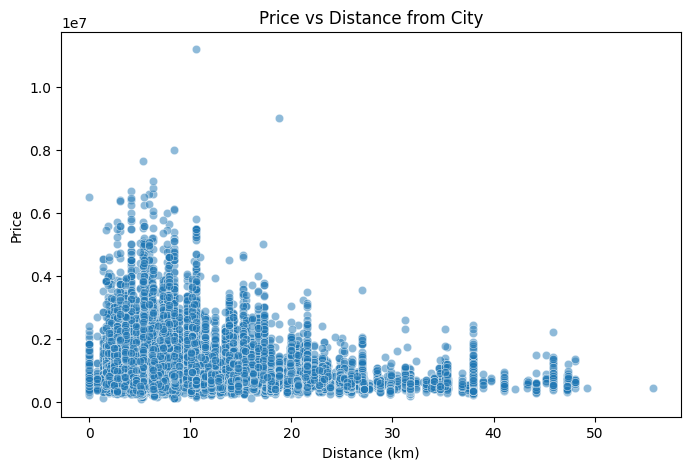

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Distance', y='Price', alpha=0.5)
plt.title("Price vs Distance from City")
plt.xlabel("Distance (km)")
plt.ylabel("Price")
plt.show()


In [14]:
print(df.columns.tolist())



['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Postcode', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea']


In [15]:

df['Price_per_room'] = df['Price'] / (df['Rooms'] + 1)
df['Log_Price'] = np.log1p(df['Price'])
df['Distance_squared'] = df['Distance'] ** 2
df['Price_per_km'] = df['Price'] / (df['Distance'] + 1)


In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = ['Suburb', 'Type', 'Method', 'Regionname', 'CouncilArea']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [17]:

df['Log_Price'] = np.log1p(df['Price'])

X = df.drop(['Price', 'Log_Price'], axis=1)
y = df['Log_Price']


In [18]:
df['Price_per_room'] = df['Price'] / (df['Rooms'] + 1)
df['Distance_squared'] = df['Distance'] ** 2
df['Room_to_Distance'] = df['Rooms'] / (df['Distance'] + 1)
df['RoomDensity'] = df['Rooms'] / (df['Propertycount'] + 1)


In [19]:

q_hi = df["Price"].quantile(0.99)
df = df[df["Price"] < q_hi]


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df.drop(['Price', 'Log_Price'], axis=1)
y = df['Log_Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

y_test_real = np.expm1(y_test)


#RF and LR


In [21]:
rf = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Convert log predictions back
y_pred_rf_real = np.expm1(y_pred_rf)

print("🌲 Random Forest:")
print("MAE:", mean_absolute_error(y_test_real, y_pred_rf_real))
print("RMSE:", np.sqrt(mean_squared_error(y_test_real, y_pred_rf_real)))
print("R²:", r2_score(y_test_real, y_pred_rf_real))

🌲 Random Forest:
MAE: 805.7662636874911
RMSE: 13893.362509487833
R²: 0.9992087320631502


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df['Log_Price'], test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Convert back
y_pred_lr_real = np.expm1(y_pred_lr)
y_test_real = np.expm1(y_test)

print("📘 Linear Regression:")
print("MAE:", mean_absolute_error(y_test_real, y_pred_lr_real))
print("RMSE:", np.sqrt(mean_squared_error(y_test_real, y_pred_lr_real)))
print("R²:", r2_score(y_test_real, y_pred_lr_real))



📘 Linear Regression:
MAE: 92472.81420666551
RMSE: 488742.84992706886
R²: 0.020803919075107813


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")

df = df.drop(['Address', 'Date', 'SellerG'], axis=1, errors='ignore')
df = df.dropna(subset=['Price'])

label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df['Price_per_room'] = df['Price'] / (df['Rooms'] + 1)
df['Log_Price'] = np.log1p(df['Price'])
df['Distance_squared'] = df['Distance'] ** 2
df['Price_per_km'] = df['Price'] / (df['Distance'] + 1)

X = df.drop(['Price', 'Log_Price'], axis=1)
y = df['Log_Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_log_lr = lr.predict(X_test)
y_pred_lr = np.expm1(y_pred_log_lr)
y_true = np.expm1(y_test)

mae_lr = mean_absolute_error(y_true, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_true, y_pred_lr))
r2_lr = r2_score(y_true, y_pred_lr)

print("📘 Linear Regression Results:")
print(f"MAE:  {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²:   {r2_lr:.4f}")

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_log_rf = rf.predict(X_test)
y_pred_rf = np.expm1(y_pred_log_rf)

mae_rf = mean_absolute_error(y_true, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_true, y_pred_rf))
r2_rf = r2_score(y_true, y_pred_rf)

print("\n🌲 Random Forest Results:")
print(f"MAE:  {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²:   {r2_rf:.4f}")

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R² Score": [r2_lr, r2_rf]
})

print("\n📈 Model Comparison:")
print(results)


📘 Linear Regression Results:
MAE:  121657.37
RMSE: 597889.20
R²:   -0.0435

🌲 Random Forest Results:
MAE:  987.44
RMSE: 16247.78
R²:   0.9992

📈 Model Comparison:
               Model            MAE           RMSE  R² Score
0  Linear Regression  121657.366974  597889.204216 -0.043509
1      Random Forest     987.439342   16247.780510  0.999229


In [24]:
df['Price_Category'] = pd.qcut(df['Price'], q=3, labels=['Low', 'Medium', 'High'])

le_price_cat = LabelEncoder()
df['Price_Category'] = le_price_cat.fit_transform(df['Price_Category'])

X = df.drop(['Price', 'Log_Price', 'Price_Category'], axis=1)
y = df['Price_Category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train)

y_pred_log = log_clf.predict(X_test)

print("🎯 Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log, target_names=le_price_cat.classes_))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("✅ Accuracy:", accuracy_score(y_test, y_pred_log))


🎯 Logistic Regression Classification Report:
              precision    recall  f1-score   support

        High       0.97      0.96      0.97      3269
         Low       0.96      0.95      0.96      3205
      Medium       0.91      0.93      0.92      3213

    accuracy                           0.95      9687
   macro avg       0.95      0.95      0.95      9687
weighted avg       0.95      0.95      0.95      9687

📊 Confusion Matrix:
[[3132    0  137]
 [   0 3055  150]
 [  89  131 2993]]
✅ Accuracy: 0.9476618148033447


#LSTM

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

df = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")
df = df.drop(['Address', 'Date', 'SellerG'], axis=1, errors='ignore')
df = df.dropna(subset=['Price'])

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df['Log_Price'] = np.log1p(df['Price'])

X = df.drop(['Price', 'Log_Price'], axis=1)
y = df['Log_Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("\n📊 LSTM Results:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")


Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1090/1090 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 68.3869 - val_loss: 0.2288
Epoch 2/150
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.1859 - val_loss: 0.1052
Epoch 3/150
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7518 - val_loss: 0.0835
Epoch 4/150
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5354 - val_loss: 0.0872
Epoch 5/150
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3656 - val_loss: 0.0801
Epoch 6/150
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1978 - val_loss: 0.0739
Epoch 7/150
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1141 - val_loss: 0.0748
Epoch 8/150
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0871 - val_loss: 0.0757
Epoch 9/150
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0801 - val_loss: 0.0724
Epoch 10/150
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0787 - val_loss: 0.0698
Epoch 11/150
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0751 - val_loss: 0.0768
Epoch 12/150
1090/1090 ━━━━━━━


📈 Model Comparison DataFrame:
               Model            MAE           RMSE  R² Score
0  Linear Regression  121657.366974  597889.204216 -0.043509
1      Random Forest     987.439342   16247.780510  0.999229
2               LSTM  184677.240804  312503.360816  0.714922


/tmp/ipython-input-26-1021068144.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x="Model", y="MAE", data=model_comparison_df, palette="viridis")
/tmp/ipython-input-26-1021068144.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x="Model", y="RMSE", data=model_comparison_df, palette="viridis")
/tmp/ipython-input-26-1021068144.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x="Model", y="R² Score", data=model_comparison_df, palette="viridis")


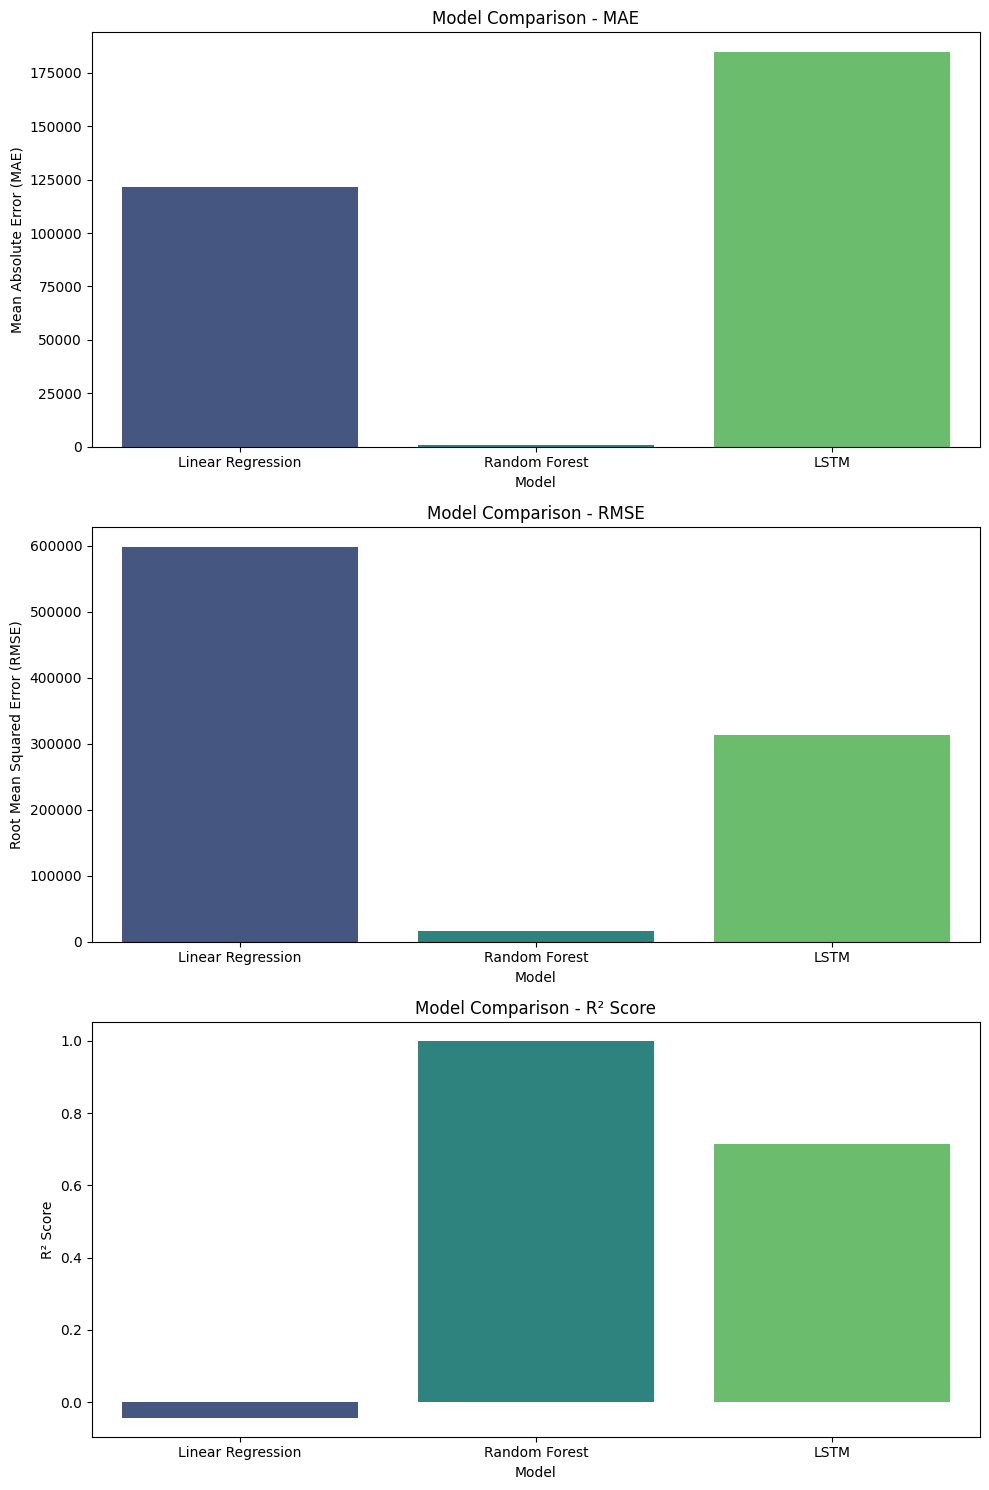

In [26]:
# prompt: Give code for comparision of all the models in graph

import pandas as pd
import matplotlib.pyplot as plt
# Define model results (assuming you have these metrics from the previous code)
model_names = ["Linear Regression", "Random Forest", "LSTM"]
mae_scores = [mae_lr, mae_rf, mae]
rmse_scores = [rmse_lr, rmse_rf, rmse]
r2_scores = [r2_lr, r2_rf, r2]

# Create a DataFrame for easy plotting
model_comparison_df = pd.DataFrame({
    "Model": model_names,
    "MAE": mae_scores,
    "RMSE": rmse_scores,
    "R² Score": r2_scores
})

print("\n📈 Model Comparison DataFrame:")
print(model_comparison_df)

# Plotting the comparison
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.barplot(ax=axes[0], x="Model", y="MAE", data=model_comparison_df, palette="viridis")
axes[0].set_title("Model Comparison - MAE")
axes[0].set_ylabel("Mean Absolute Error (MAE)")

sns.barplot(ax=axes[1], x="Model", y="RMSE", data=model_comparison_df, palette="viridis")
axes[1].set_title("Model Comparison - RMSE")
axes[1].set_ylabel("Root Mean Squared Error (RMSE)")

sns.barplot(ax=axes[2], x="Model", y="R² Score", data=model_comparison_df, palette="viridis")
axes[2].set_title("Model Comparison - R² Score")
axes[2].set_ylabel("R² Score")

plt.tight_layout()
plt.show()

#SAVE MODEL

In [27]:
import joblib
import pickle
from tensorflow.keras.models import save_model

joblib.dump(lr, 'linear_regression_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(log_clf, 'logistic_regression_model.pkl')
model.save('lstm_model.keras')
joblib.dump(scaler, 'scaler.pkl')

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

joblib.dump(le_price_cat, 'price_category_encoder.pkl')

print("All models and preprocessing components saved successfully.")


All models and preprocessing components saved successfully.
